In [1]:
# importing libraries
import tweepy as tw
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
consumer_key="qrbvg9yW3oNQ9QO95SM31FcWr"
consumer_secret="B88u2Rh1t0watdxyDjn4toE63GaSpDft78B5uKlgOV3h7mbWu0"
access_token="1363755308309381123-AVyYyk0HC6NdwyA4No06oNK4jUFX8o"
access_token_secret="tIH7A7bObvCC22voUHg6qfHjx87osBBWEuuoxFle3Wqzx"

In [30]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [31]:
search_words = "RussiainvadedUkraine"

In [32]:
tweets = tw.Cursor(api.search_tweets, q=search_words, lang="en").items(5000)

In [33]:
tweets_copy = []
for tweet in tqdm(tweets):
    tweets_copy.append(tweet)

2644it [00:54, 54.22it/s]Rate limit reached. Sleeping for: 849
2644it [01:10, 54.22it/s]

In [ ]:
print(f"New tweets retrieved: {len(tweets_copy)}")

In [ ]:
tweets_df = pd.DataFrame()
for tweet in tqdm(tweets_copy):
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'id': tweet.user.id,
                                               'screen_name' : tweet.screen_name,
                                               'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_created': tweet.user.created_at,
                                               'user_followers': tweet.user.followers_count,
                                               'user_friends': tweet.user.friends_count,
                                               'user_favourites': tweet.user.favourites_count,
                                               'user_verified': tweet.user.verified,
                                               'text': tweet.text,
                                               'source': tweet.source,
                                               'is_retweet': tweet.retweeted}, index=[0]))

In [ ]:
tweets_df.head()

In [ ]:
tweets_df.to_csv('politicalHashtag.csv',index=False)

In [2]:
# reading the datafile 
tweets_df1 = pd.read_csv(r"C:\Users\patel\OneDrive\Desktop\KDDM\Project\Python Notebook\politicalHashtag.csv")
tweets_df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,source,is_retweet
0,FinchHaven (Photography),"Salish Sea, Cascadia, Nor Am",Tweets from FinchHaven (Digital Photography)\n...,2009-10-28 15:44:42+00:00,406,31,28463,False,RT @Militarylandnet: source: https://t.co/IFe6...,Twitter Web App,False
1,Inkyswill,"Swamp'nCanalLand, USA","Science and space are cool, and the world is a...",2016-06-30 00:19:29+00:00,266,1055,15320,False,"RT @EuromaidanPress: In Mariupol, 36th Separat...",Twitter for Android,False
2,Olof Gisslén,Tallinn,"Entreprenör som gillar Bridge, Poker, Fiske sa...",2011-01-21 08:00:54+00:00,1437,4518,141218,False,RT @MavkaSlavka: Your daily reminder that #Rus...,Twitter for iPhone,False
3,Frank Berkemeier,Acta non verba,semper paratus ■ semper fidelus ■ semper antic...,2022-01-14 15:32:19+00:00,109,78,1708,False,RT @Militarylandnet: source: https://t.co/IFe6...,TweetDeck,False
4,MilitaryLand.net,NaN,Military blog focusing primarily on 🇺🇦 Ukraini...,2017-11-26 15:46:47+00:00,133477,23,91,False,source: https://t.co/IFe6Weyk0i,Twitter Web App,False


In [3]:
tweets_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_name         5000 non-null   object
 1   user_location     2860 non-null   object
 2   user_description  3853 non-null   object
 3   user_created      5000 non-null   object
 4   user_followers    5000 non-null   int64 
 5   user_friends      5000 non-null   int64 
 6   user_favourites   5000 non-null   int64 
 7   user_verified     5000 non-null   bool  
 8   text              5000 non-null   object
 9   source            5000 non-null   object
 10  is_retweet        5000 non-null   bool  
dtypes: bool(2), int64(3), object(6)
memory usage: 361.5+ KB


In [4]:
tweets_df1.describe()

,user_followers,user_friends,user_favourites
count,5000.000000,5000.000000,5.000000e+03
mean,2313.208200,1696.750000,4.689620e+04
std,16633.289009,5058.476388,1.028890e+05
min,0.000000,0.000000,0.000000e+00
25%,47.000000,111.000000,1.210250e+03
50%,211.000000,449.000000,9.824000e+03
75%,1245.000000,1692.750000,4.408000e+04
max,977420.000000,123961.000000,1.470747e+06


<AxesSubplot:>

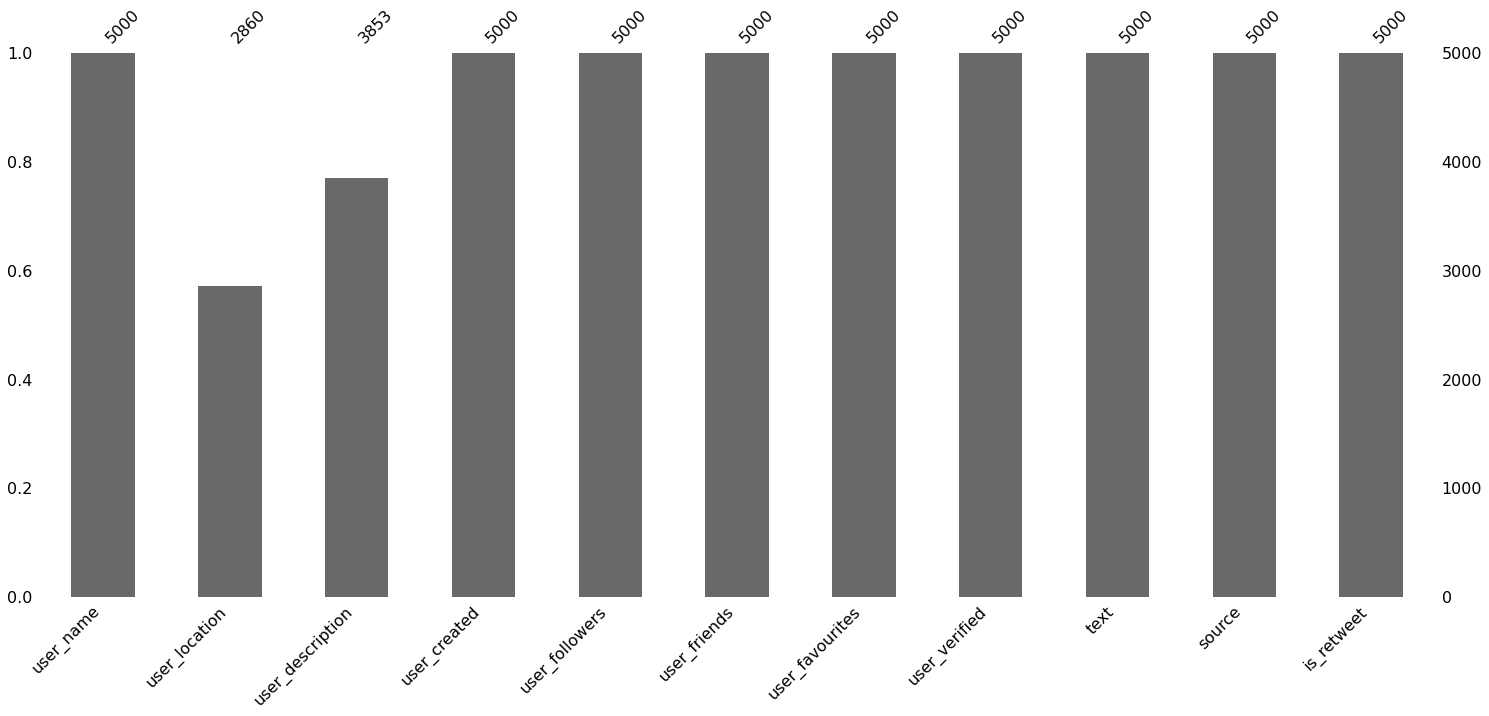

In [5]:
# finding null values
msno.bar(tweets_df1)
#tweets_df1.isnull().sum()

In [6]:
tweets_df1 = tweets_df1.dropna()

In [7]:
tweets_df1.isnull().sum()

user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
text                0
source              0
is_retweet          0
dtype: int64

In [8]:
tweets_df1['user_created'] = pd.to_datetime(tweets_df1['user_created'],format='%Y%m%d %H:%M:%S.%f')
tweets_df1['user_created'] = pd.DatetimeIndex(tweets_df1['user_created']).year
tweets_df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,source,is_retweet
0,FinchHaven (Photography),"Salish Sea, Cascadia, Nor Am",Tweets from FinchHaven (Digital Photography)\n...,2009,406,31,28463,False,RT @Militarylandnet: source: https://t.co/IFe6...,Twitter Web App,False
1,Inkyswill,"Swamp'nCanalLand, USA","Science and space are cool, and the world is a...",2016,266,1055,15320,False,"RT @EuromaidanPress: In Mariupol, 36th Separat...",Twitter for Android,False
2,Olof Gisslén,Tallinn,"Entreprenör som gillar Bridge, Poker, Fiske sa...",2011,1437,4518,141218,False,RT @MavkaSlavka: Your daily reminder that #Rus...,Twitter for iPhone,False
3,Frank Berkemeier,Acta non verba,semper paratus ■ semper fidelus ■ semper antic...,2022,109,78,1708,False,RT @Militarylandnet: source: https://t.co/IFe6...,TweetDeck,False
5,Hartblik John. Show your heart.,"Gouda, Nederland","@Chr1stenJohn\nChristian, medical science, imm...",2012,1538,4904,783,False,RT @MavkaSlavka: Your daily reminder that #Rus...,Twitter Web App,False


In [9]:
bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face|bolly'

tweets_df1['user_name'] = tweets_df1.user_name.astype(str).str.contains(bag_of_words_bot, case=False, na=False)
tweets_df1['text'] = tweets_df1.text.astype(str).str.contains(bag_of_words_bot, case=False, na=False)
tweets_df1['user_description'] = tweets_df1.user_description.astype(str).str.contains(bag_of_words_bot, case=False, na=False)
tweets_df1['source'] = tweets_df1.source.astype(str).str.contains(bag_of_words_bot, case=False, na=False)
tweets_df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,source,is_retweet
0,False,"Salish Sea, Cascadia, Nor Am",True,2009,406,31,28463,False,False,False,False
1,False,"Swamp'nCanalLand, USA",True,2016,266,1055,15320,False,False,False,False
2,False,Tallinn,False,2011,1437,4518,141218,False,False,False,False
3,False,Acta non verba,False,2022,109,78,1708,False,False,False,False
5,False,"Gouda, Nederland",False,2012,1538,4904,783,False,False,False,False


In [10]:
tweets_df1 = tweets_df1.replace({'user_verified':{False:0, True:1}})
tweets_df1 = tweets_df1.replace({'is_retweet':{False:0, True:1}})
tweets_df1 = tweets_df1.replace({'user_name':{False:0, True:1}})
tweets_df1 = tweets_df1.replace({'user_description':{False:0, True:1}})
tweets_df1 = tweets_df1.replace({'text':{False:0, True:1}})
tweets_df1 = tweets_df1.replace({'source':{False:0, True:1}})
tweets_df1.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,source,is_retweet
0,0,"Salish Sea, Cascadia, Nor Am",1,2009,406,31,28463,0,0,0,0
1,0,"Swamp'nCanalLand, USA",1,2016,266,1055,15320,0,0,0,0
2,0,Tallinn,0,2011,1437,4518,141218,0,0,0,0
3,0,Acta non verba,0,2022,109,78,1708,0,0,0,0
5,0,"Gouda, Nederland",0,2012,1538,4904,783,0,0,0,0


In [11]:
tweets_df1.loc[tweets_df1['user_location'].notnull(), 'user_location'] = 1

In [12]:
# cleaned binary data
tweets_df1

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,source,is_retweet
0,0,1,1,2009,406,31,28463,0,0,0,0
1,0,1,1,2016,266,1055,15320,0,0,0,0
2,0,1,0,2011,1437,4518,141218,0,0,0,0
3,0,1,0,2022,109,78,1708,0,0,0,0
5,0,1,0,2012,1538,4904,783,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4988,1,1,0,2018,164,611,20469,0,0,0,0
4989,0,1,0,2020,132,1047,1991,0,0,0,0
4993,0,1,0,2020,1707,3095,19749,0,0,0,0
4997,0,1,0,2013,5700,5676,107895,0,0,0,0


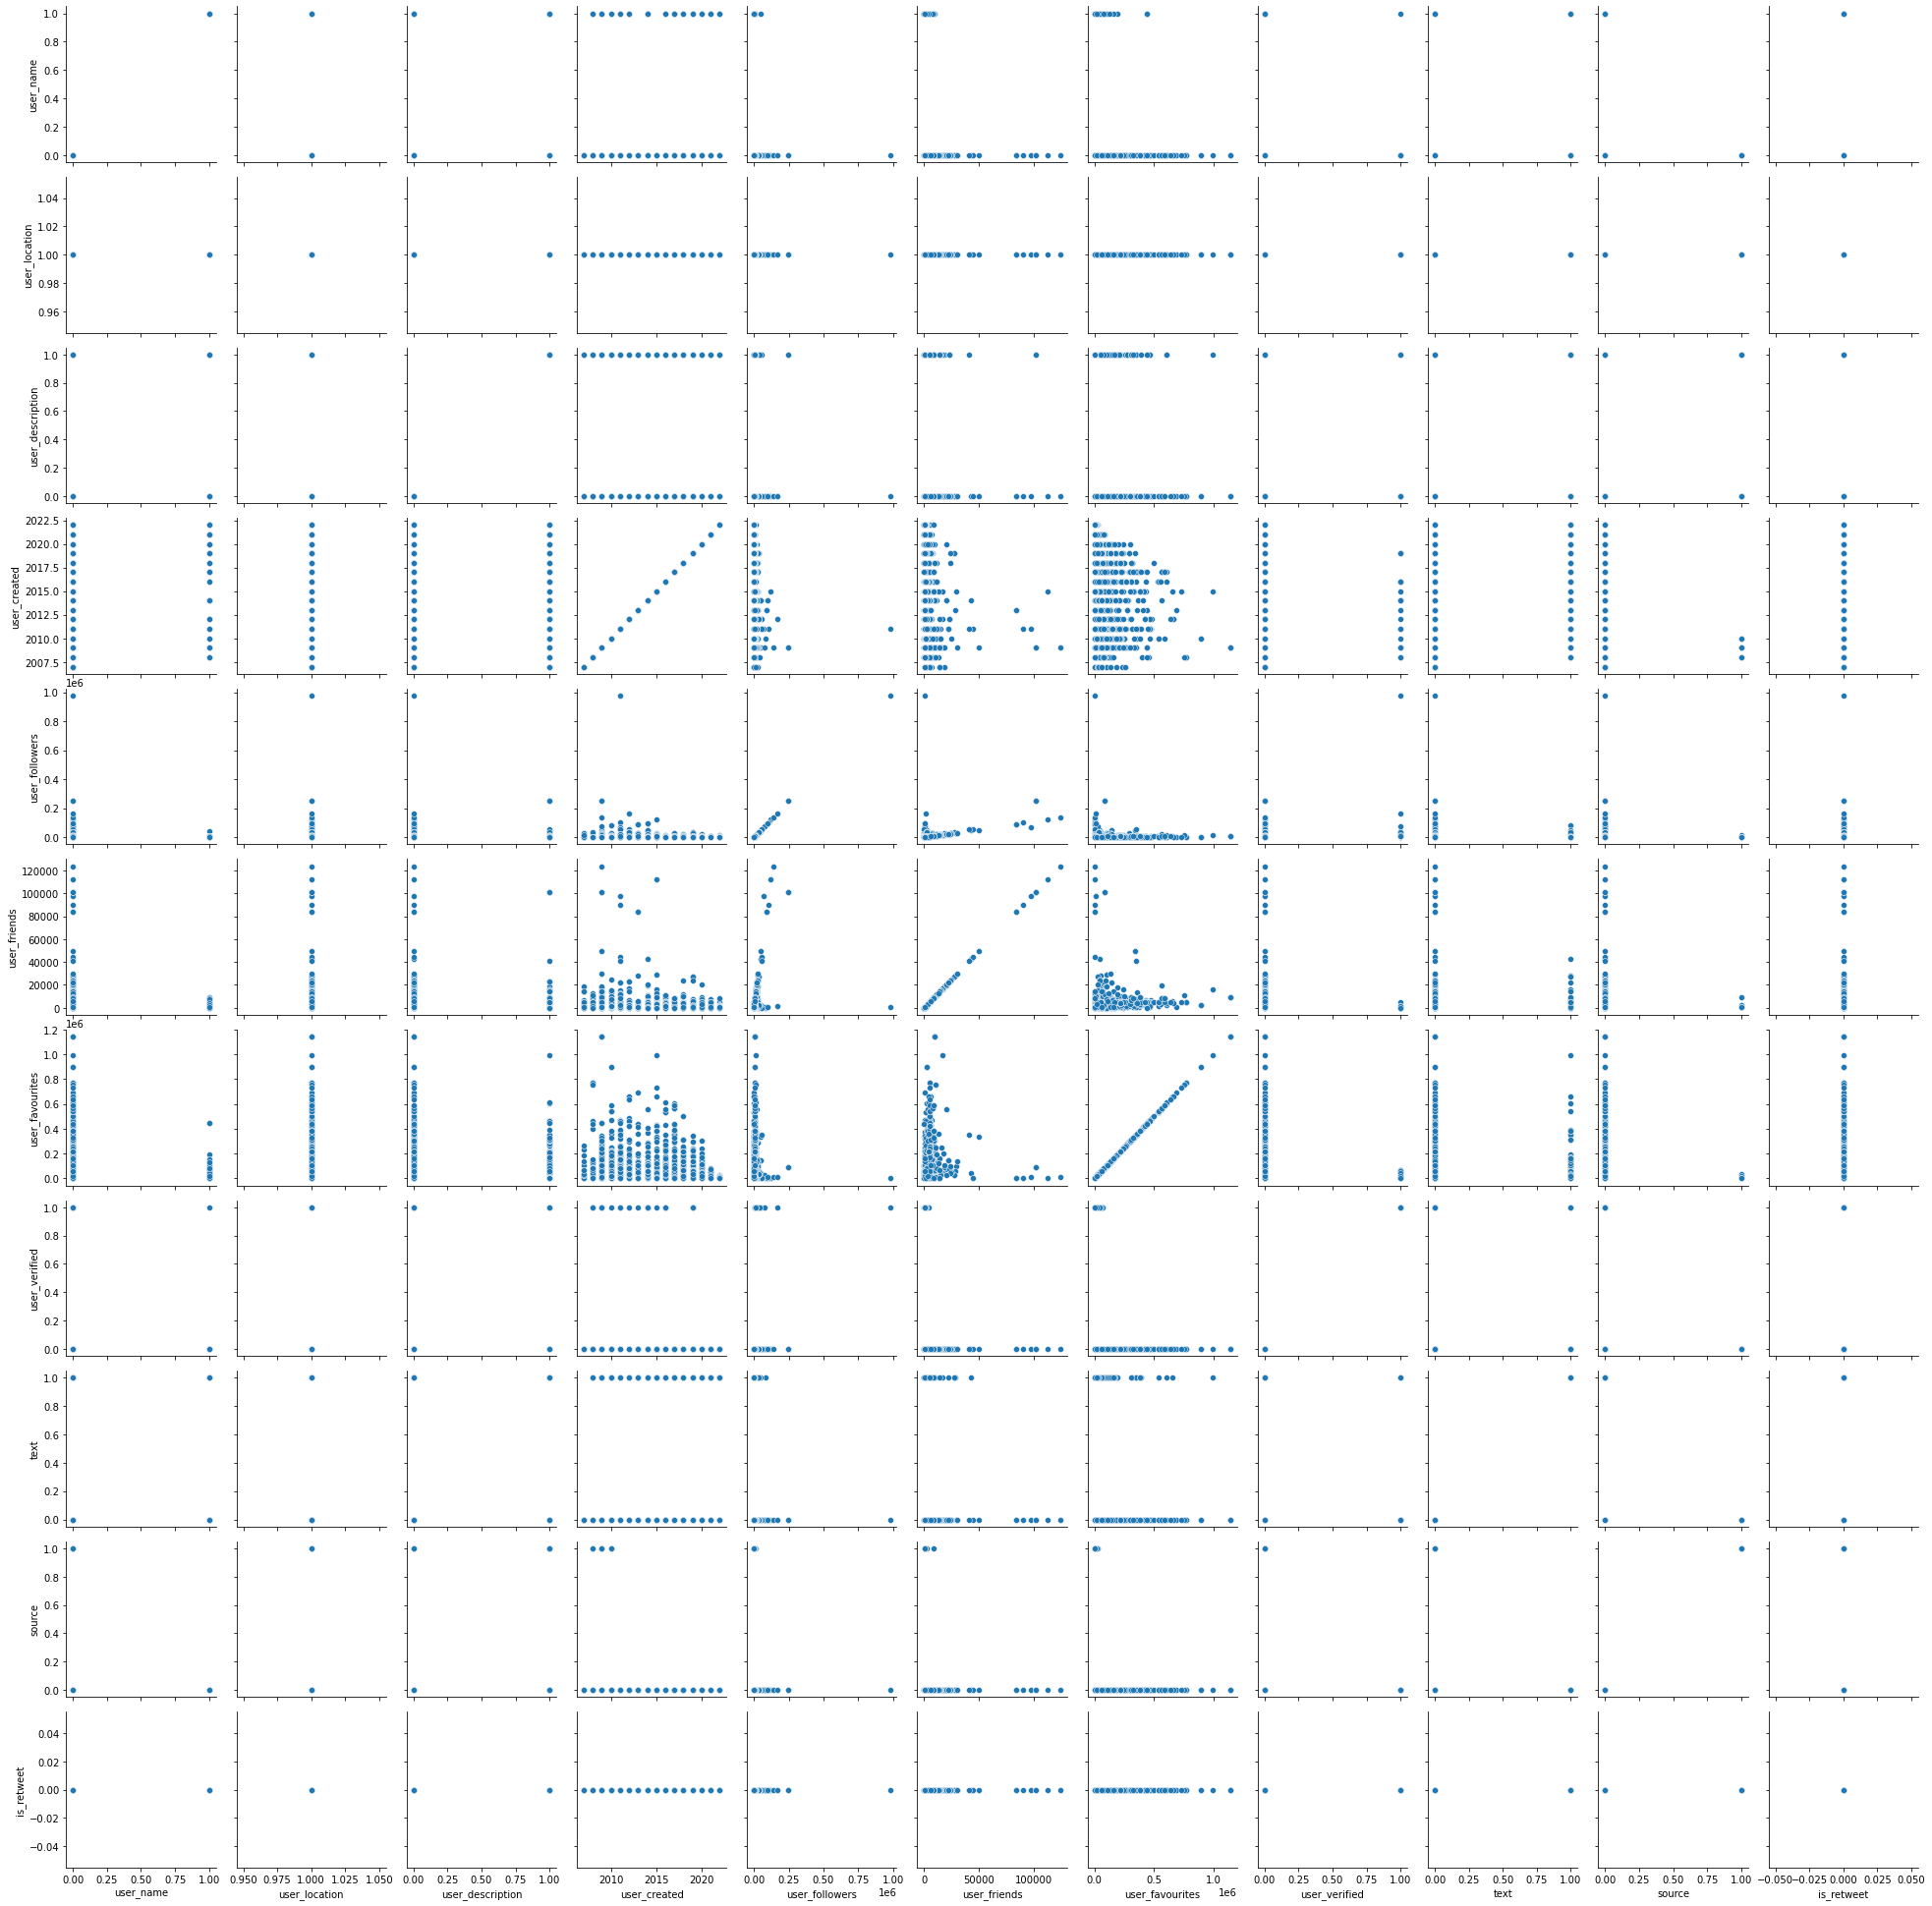

In [13]:
g = sns.PairGrid(tweets_df1)
g.map(sns.scatterplot)

In [14]:
from sklearn import preprocessing
scaled_data = preprocessing.MinMaxScaler().fit_transform(tweets_df1)

In [15]:
scaled_tweets = pd.DataFrame(scaled_data, index=tweets_df1.index, columns=tweets_df1.columns)

C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


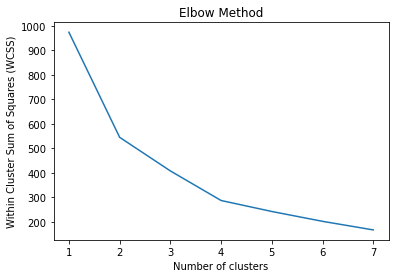

In [16]:
# applying k-means clustering
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 8):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 
                    max_iter = 300,                     
                    n_init = 10,                        
                    random_state = 0)                   
    model.fit(scaled_tweets)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')                               
plt.xlabel('Number of clusters')                        
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      
plt.show()

In [17]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_tweets)
tweets_df1['cluster'] = kmeans.labels_

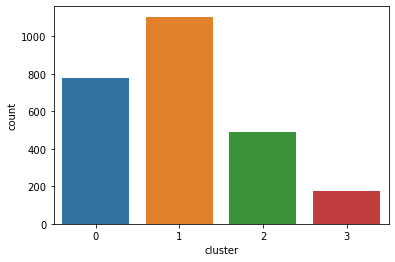

In [18]:
ax = sns.countplot(x="cluster", data=tweets_df1)